In [4]:
import pandas as pd

df =  pd.read_csv("../output/tfidf_by_speaker_trimmed.csv")

# Drop the frequency columns right away
df.drop(columns=['term_freq', 'doc_freq', 'Unnamed: 0'], inplace=True )
df.shape

(1651, 4)

In [5]:
df.rename(columns={'speaker_gender': 'speaker'}, inplace=True)
df.head()

,speaker,subject,verb,tfidf
0,man,i,learn,51.775912
1,man,i,mean,51.195231
2,man,i,spend,48.590691
3,man,i,meet,47.025810
4,man,i,decide,46.472787


In [24]:
verbs = df.pivot_table(index='verb', 
                     columns=['speaker', 'subject'], 
                     values='tfidf', fill_value=0)
verbs.head()

speaker         man                         woman                    
subject          he         i       she        he         i       she
verb                                                                 
's         0.549778  3.508414  0.152547  0.000000  1.868872  0.412866
absorb     0.000000  0.152547  0.000000  0.000000  0.180592  0.000000
abuse      0.000000  0.341168  0.000000  0.180592  0.000000  0.000000
accept     0.341168  1.518620  0.152547  0.000000  1.949088  0.000000
accompany  0.152547  0.000000  0.000000  0.180592  0.000000  0.000000

In [7]:
verbs['man_i-he'] = verbs['man']['i'] - verbs['man']['he']
verbs['man_i-she'] = verbs['man']['i'] - verbs['man']['she']
verbs['woman_i-he'] = verbs['woman']['i'] - verbs['woman']['he']
verbs['woman_i-she'] = verbs['woman']['i'] - verbs['woman']['she']

In [8]:
verbs.sort_values('man_i-he')

speaker       man                          woman                        
subject        he          i       she        he          i       she   
verb                                                                    
point    1.259552   0.341168  0.000000  0.180592   0.180592  0.180592  \
kill     1.469478   0.773835  0.152547  1.527535   0.675870  0.000000   
fund     0.549778   0.000000  0.152547  0.000000   0.180592  0.000000   
die      1.010934   0.549778  0.000000  0.361185   0.180592  0.412866   
seem     1.010934   0.549778  0.341168  0.000000   0.412866  0.000000   
...           ...        ...       ...       ...        ...       ...   
decide   2.294561  46.472787  0.549778  0.412866  19.393590  0.412866   
meet     1.213121  47.025810  0.549778  0.180592  30.953596  0.412866   
spend    2.010762  48.590691  0.152547  0.963614  26.867538  0.619299   
mean     1.889328  51.195231  0.549778  0.180592  15.527559  0.412866   
learn    1.679403  51.775912  0.152547  1.272946  25.266508  0.825732   

speaker   man_i-he  man_i-she woman_i-he woman_i-she  
subject                                               
verb                                                  
point    -0.918384   0.341168   0.000000    0.000000  
kill     -0.695643   0.621288  -0.851665    0.675870  
fund     -0.549778  -0.152547   0.180592    0.180592  
die      -0.461156   0.549778  -0.180592   -0.232274  
seem     -0.461156   0.208610   0.412866    0.412866  
...            ...        ...        ...         ...  
decide   44.178227  45.923009  18.980724   18.980724  
meet     45.812689  46.476032  30.773003   30.540730  
spend    46.579929  48.438144  25.903924   26.248239  
mean     49.305902  50.645452  15.346967   15.114693  
learn    50.096509  51.623365  23.993562   24.440776  

[487 rows x 10 columns]

In [9]:
# verbs.to_csv('../output/gender-differences.csv')

In [ ]:
verbs['man_i-he']
verbs['man_i-she']
verbs['woman_i-he']
verbs['woman_i-she'] 

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]

In [27]:
terms = verbs.reset_index()['verb'].values

In [36]:
x = verbs['man']['i'].values
y = verbs['man']['he'].values
terms = verbs.reset_index()['verb'].values.tolist()

In [38]:
terms[0:5]

["'s", 'absorb', 'abuse', 'accept', 'accompany']

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

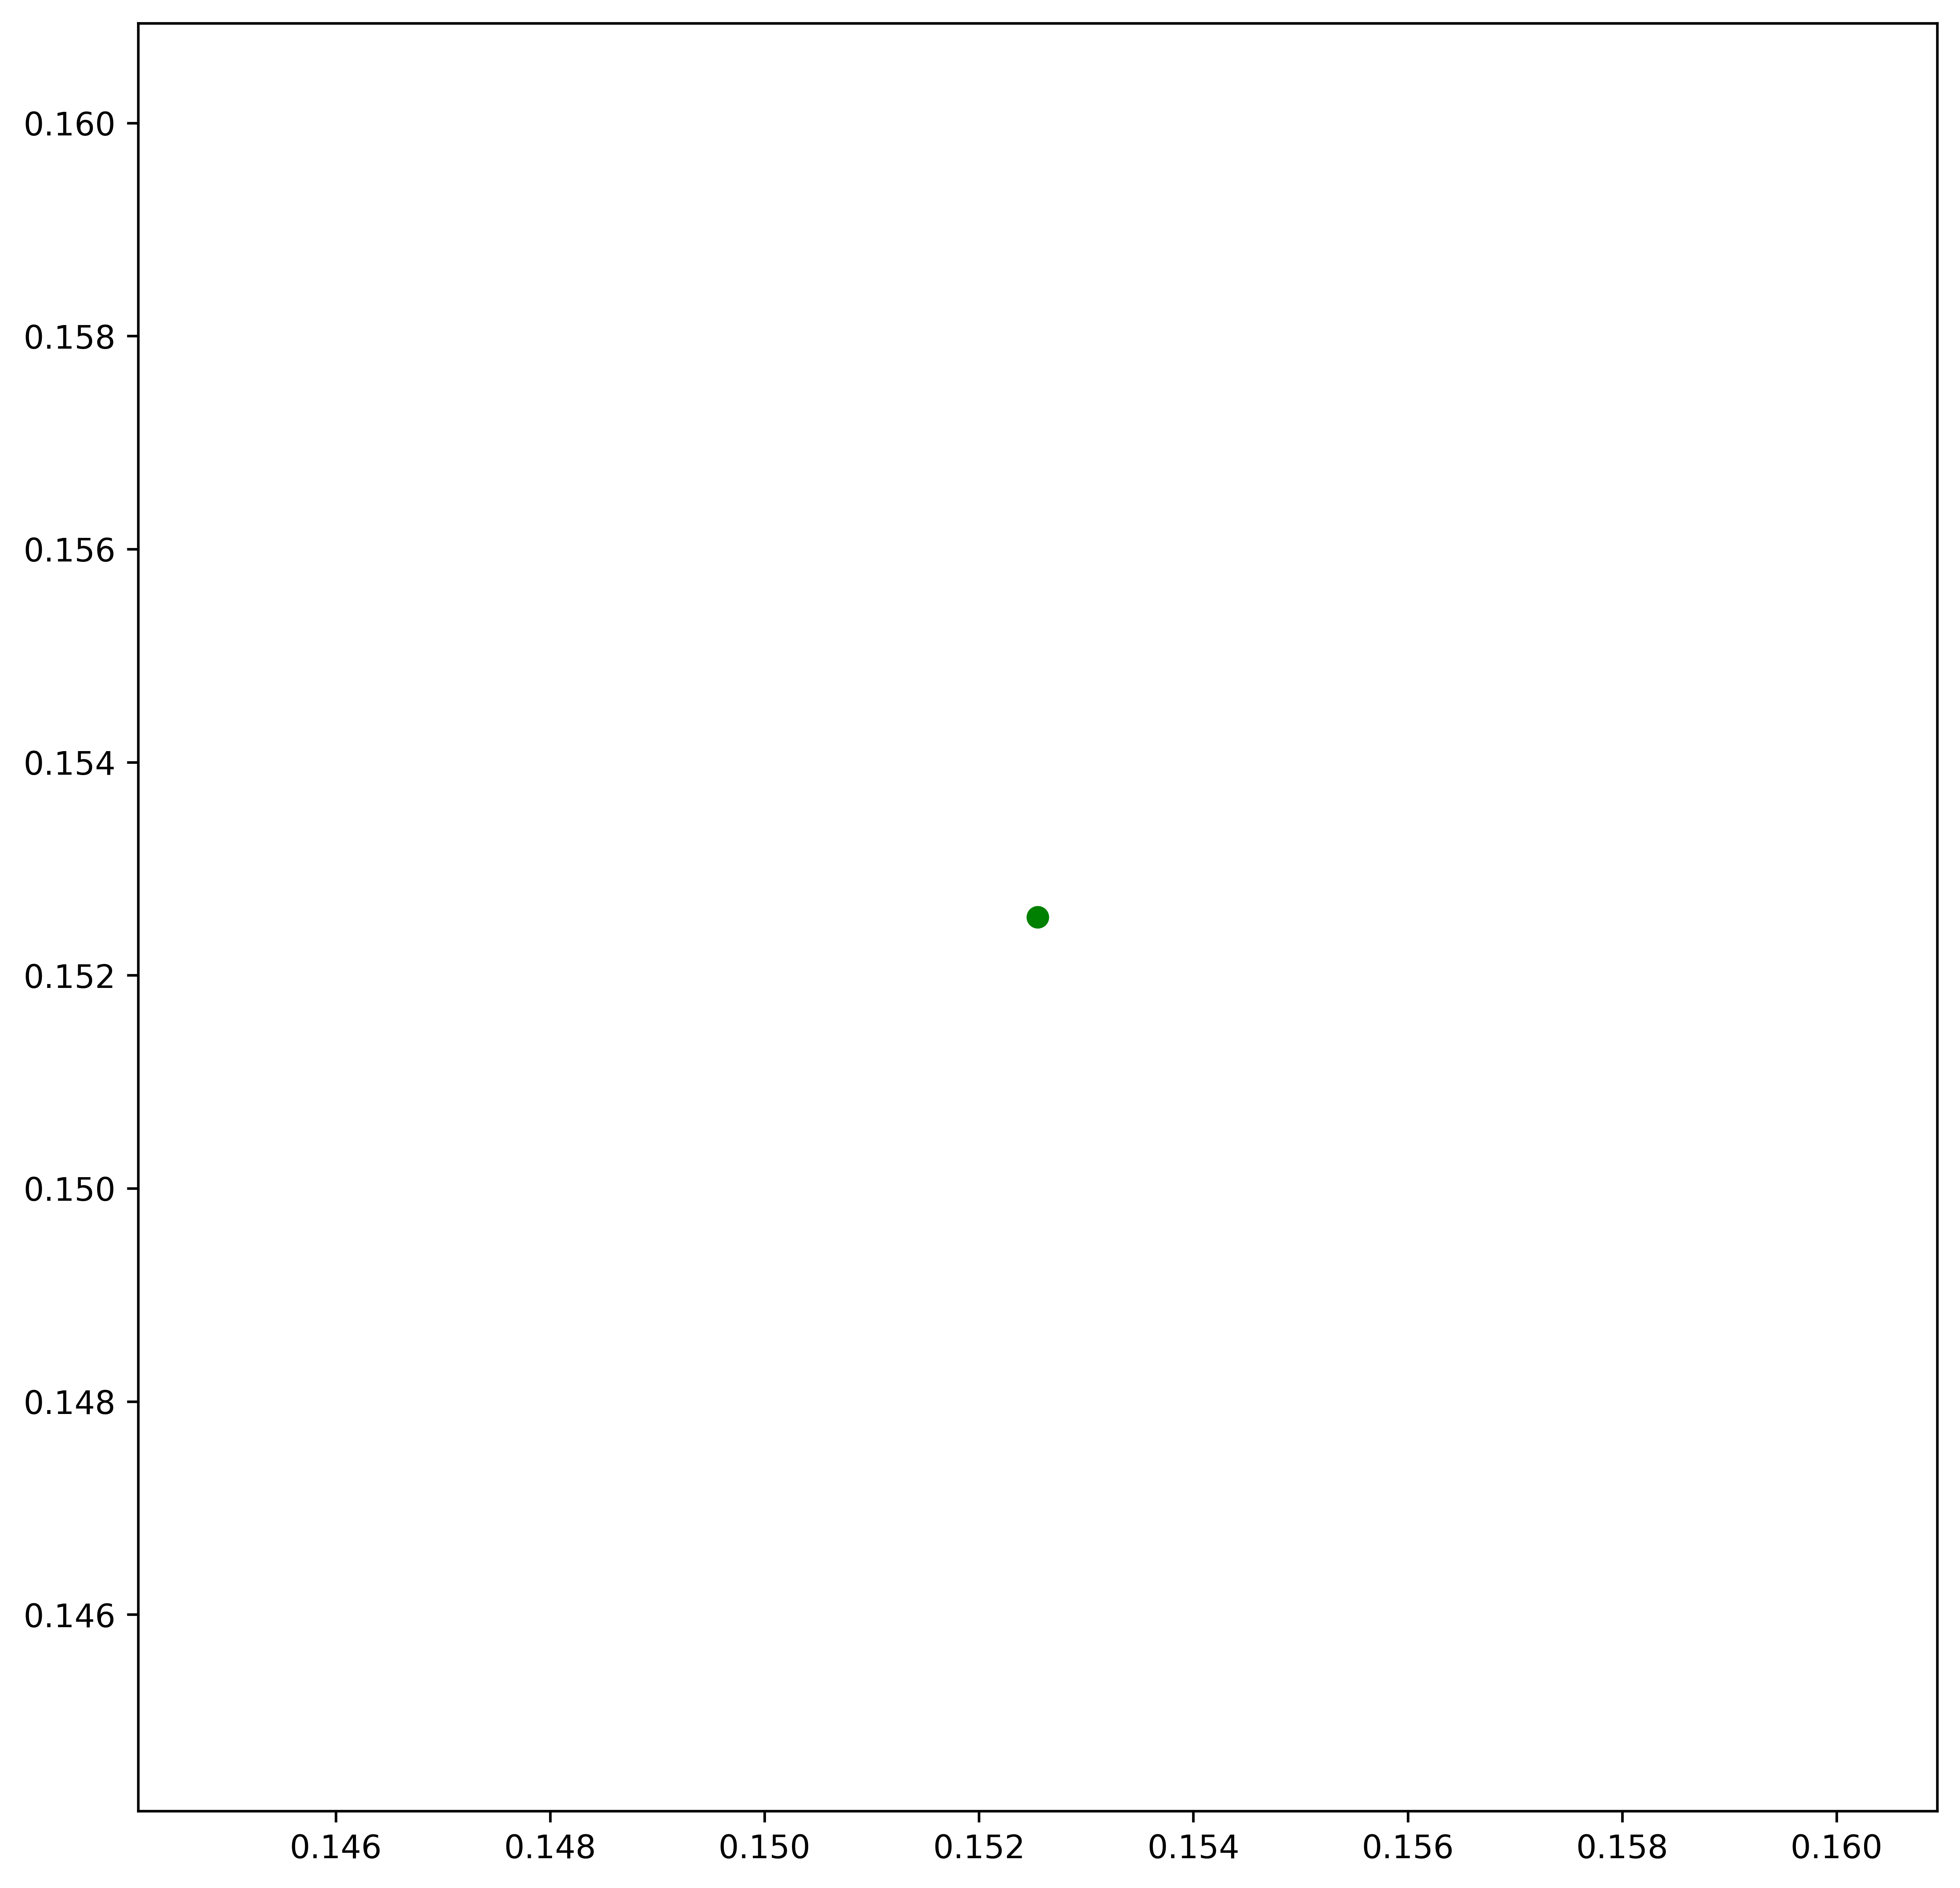

In [46]:
fig, ax = plt.subplots()

ax.scatter(x, 
           y,
           c="green",
           label="Men's I - He")
ax.set_xlabel("Men's I")
ax.set_ylabel("Men's He")

for (x, y) in zip(x, y):
    plt.text(x, y, terms)

ax.legend()
plt.show()